# IMPORTS

In [38]:
import collections
import matplotlib.pyplot as plt
from collections import defaultdict
import collections
import numpy as np
from statistics import mean 
import time
import networkx as nx
from scipy import stats
from sklearn import preprocessing

# GRAPH READER

In [39]:
"""Benchmark dataset reader."""
ts = time.time()
from littleballoffur.data_reader import GraphReader

reader = GraphReader('github')

graph = reader.get_graph()

time.time() - ts


original graph nodes 37700


0.2746250629425049

In [40]:
print(len(graph.nodes()))

37700


# SAMPLING

Random Walk Sampler

In [41]:
ts = time.time()
#Random walk

from littleballoffur.exploration_sampling import RandomWalkSampler

sampler = RandomWalkSampler(7540)

rw_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(rw_graph.nodes))
time.time() - ts

original graph nodes 37700
after sampling graph nodes 7540


0.1397390365600586

Non Back Tracking Random Walk

In [42]:
ts = time.time()
"""Non back-tracking random walk sampler example"""

from littleballoffur.exploration_sampling import NonBackTrackingRandomWalkSampler

sampler = NonBackTrackingRandomWalkSampler(7540)

nrw_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(nrw_graph.nodes))
time.time() - ts

original graph nodes 37700
after sampling graph nodes 7540


0.14082098007202148

Metropolis Hastings Random Walk Sampler

In [43]:
ts = time.time()
"""Snow ball sampler example"""

from littleballoffur.exploration_sampling import MetropolisHastingsRandomWalkSampler

sampler = MetropolisHastingsRandomWalkSampler(number_of_nodes = 7540)

metropolis_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(metropolis_graph.nodes))
time.time() - ts

original graph nodes 37700
after sampling graph nodes 7540


0.08853983879089355

Forest Fire Sampler

In [44]:
ts = time.time()
"""Forest fire sampler example"""

from littleballoffur.exploration_sampling import ForestFireSampler

sampler = ForestFireSampler(7540)

ff_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(ff_graph.nodes))
time.time() - ts

original graph nodes 37700
after sampling graph nodes 7540


0.14836621284484863

Spiky Sampler

In [45]:
ts = time.time()
"""Shortest path sampler example"""

from littleballoffur.exploration_sampling import SpikyBallSampler

sampler = SpikyBallSampler(7540)

spiky_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(spiky_graph.nodes))
time.time() - ts

original graph nodes 37700
after sampling graph nodes 7540


0.37714195251464844

# STATISTICS

In [46]:
ts = time.time()
#Original graph
print('Average Clustering - Original: ',nx.average_clustering(graph))

print('-------------------------------------------------------------------')
#Random Walk
print('Average Clustering - Random Walk: ',nx.average_clustering(rw_graph))

#Non Back tracking Random Walk
print('Average Clustering - Non back Tracking Random Walk: ',nx.average_clustering(nrw_graph))

#Metropolis Hastings Random Walk
print('Average Clustering - Metropolis Hastings Random Walk: ',nx.average_clustering(metropolis_graph))

#Forest Fire
print('Average Clustering - Forest Fire: ',nx.average_clustering(ff_graph))

#Spiky 
print('Average Clustering - Spiky: ',nx.average_clustering(spiky_graph))


time.time() - ts



Average Clustering - Original:  0.16753704480107323
-------------------------------------------------------------------
Average Clustering - Random Walk:  0.20812797250645457
Average Clustering - Non back Tracking Random Walk:  0.20387326657442462
Average Clustering - Metropolis Hastings Random Walk:  0.1763014679142935
Average Clustering - Forest Fire:  0.18930456126282394
Average Clustering - Spiky:  0.20963718239786983


102.48670983314514

In [47]:
ts = time.time()
#Original graph
print('Triangles Percentage - Original: ',(sum(nx.triangles(graph).values()) / 3)/len(graph.nodes))

print('-------------------------------------------------------------------')
#Random Walk
print('Triangles Percentage- Random Walk: ',(sum(nx.triangles(rw_graph).values()) / 3)/len(rw_graph.nodes))

#Non Back tracking Random Walk
print('Triangles Percentage - Non back Tracking Random Walk: ',(sum(nx.triangles(nrw_graph).values()) / 3)/len(nrw_graph.nodes))

#Metropolis Hastings Random Walk
print('Triangles Percentage - Metropolis Hastings Random Walk: ',(sum(nx.triangles(metropolis_graph).values()) / 3)/len(metropolis_graph.nodes))

#Forest Fire
print('Triangles Percentage - Forest Fire: ',(sum(nx.triangles(ff_graph).values()) / 3)/len(ff_graph.nodes))

#Spiky 
print('Triangles Percentage - Spiky: ',(sum(nx.triangles(spiky_graph).values()) / 3)/len(spiky_graph.nodes))



time.time() - ts



Triangles Percentage - Original:  13.894164456233423
-------------------------------------------------------------------
Triangles Percentage- Random Walk:  36.994297082228115
Triangles Percentage - Non back Tracking Random Walk:  36.50106100795756
Triangles Percentage - Metropolis Hastings Random Walk:  16.19973474801061
Triangles Percentage - Forest Fire:  39.09721485411141
Triangles Percentage - Spiky:  18.84814323607427


100.86446905136108

In [48]:
ts = time.time()
#Original graph
print('Size of largest connected component - Original: ',len(max(nx.connected_components(graph))))

print('-------------------------------------------------------------------')
#Random Walk
print('Size of largest connected component- Random Walk: ',len(max(nx.connected_components(rw_graph))))

#Non Back tracking Random Walk
print('Size of largest connected component - Non back Tracking Random Walk: ',len(max(nx.connected_components(nrw_graph))))

#Metropolis Hastings Random Walk
print('Size of largest connected component - Metropolis Hastings Random Walk: ',len(max(nx.connected_components(metropolis_graph))))

#Forest Fire
print('Size of largest connected component - Forest Fire: ',len(max(nx.connected_components(ff_graph))))

#Spiky
print('Size of largest connected component - Spiky: ',len(max(nx.connected_components(spiky_graph))))


time.time() - ts


Size of largest connected component - Original:  37700
-------------------------------------------------------------------
Size of largest connected component- Random Walk:  7540
Size of largest connected component - Non back Tracking Random Walk:  7540
Size of largest connected component - Metropolis Hastings Random Walk:  7540
Size of largest connected component - Forest Fire:  7540
Size of largest connected component - Spiky:  7534


0.48418116569519043

In [49]:
print((nx.number_connected_components(graph)))

1


In [50]:
ts = time.time()
#Original graph
print('Degree Assortativity Coefficient - Original: ',nx.degree_assortativity_coefficient(graph))

print('-------------------------------------------------------------------')

#Random Walk
print('Degree Assortativity Coefficient - Random Walk: ',nx.degree_assortativity_coefficient(rw_graph))

#Non Back tracking Random Walk
print('Degree Assortativity Coefficient - Non back Tracking Random Walk: ',nx.degree_assortativity_coefficient(nrw_graph))

#Metropolis Hastings Random Walk
print('Degree Assortativity Coefficient - Metropolis Hastings Random Walk: ',nx.degree_assortativity_coefficient(metropolis_graph))

#Forest Fire
print('Degree Assortativity Coefficient - Forest Fire: ',nx.degree_assortativity_coefficient(ff_graph))

#Spiky
print('Degree Assortativity Coefficient - Spiky: ',nx.degree_assortativity_coefficient(spiky_graph))


time.time() - ts



Degree Assortativity Coefficient - Original:  -0.07521713413904481
-------------------------------------------------------------------
Degree Assortativity Coefficient - Random Walk:  -0.10024464328082863
Degree Assortativity Coefficient - Non back Tracking Random Walk:  -0.09894398965538334
Degree Assortativity Coefficient - Metropolis Hastings Random Walk:  -0.09247323842360487
Degree Assortativity Coefficient - Forest Fire:  -0.09307324782631879
Degree Assortativity Coefficient - Spiky:  -0.11038046180986276


84.04409909248352

# MATCHING PATTERNS - PLOTS

In [51]:
def degree_distributon(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    return deg,cnt

In [52]:
ts = time.time()
#Original 
deg,cnt = degree_distributon(graph)

#Random Walk
deg1,cnt1 = degree_distributon(rw_graph)

#Non Back tracking Random Walk
deg2,cnt2 = degree_distributon(nrw_graph)

#Metropolis Hastings Random Walk
deg5,cnt5 = degree_distributon(metropolis_graph)

#Forest Fire
deg3,cnt3 = degree_distributon(ff_graph)

#Spiky
deg4,cnt4 = degree_distributon(spiky_graph)


time.time() - ts

0.42911219596862793

Text(0.5, 0, 'Degree')

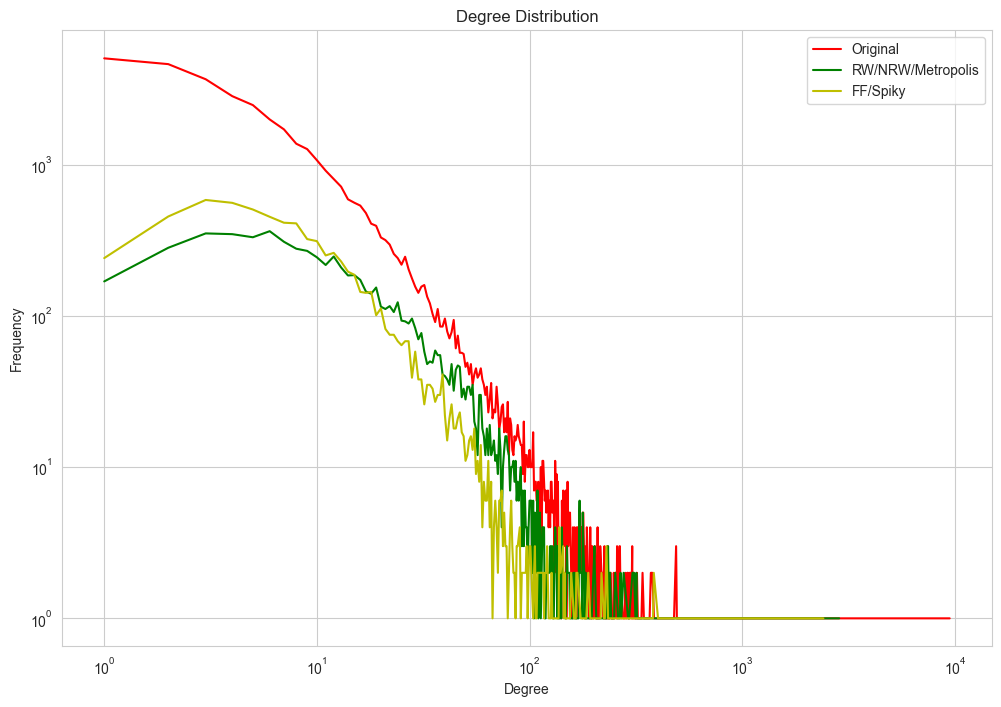

In [69]:
plt.figure(figsize=(12, 8))
plt.loglog(deg, cnt, 'r-', label='original')
# plt.loglog(deg1,cnt1, 'b-', label='RW')
# plt.loglog(deg2,cnt2,'k-', label='Non - RW')
plt.loglog(deg3, cnt3, 'g-', label='Metropolis')
# plt.loglog(deg4, cnt4, 'm-', label='FF')
plt.loglog(deg5, cnt5, 'y-', label='Spiky')
plt.legend(['Original','RW/NRW/Metropolis','FF/Spiky'])
plt.title("Degree Distribution")
plt.ylabel("Frequency")
plt.yscale('log')
# plt.xscale('log')
plt.xlabel("Degree")

In [54]:
def degree_clustering(original, sample):
   degree = sample.degree()
   degree_list,degrees,clustering_list,kstest = [],[],[],[]
   
   for n,m in degree:
      degree_list.append(m)
   degree_list
   degree_np = np.asarray(sorted(degree_list))
  

   for k in range(len(np.unique(degree_np))):
      sample_nodes_degree_k = ([u for u in sample.nodes() if sample.degree(u) == k])
      if len(sample_nodes_degree_k) != 0:
        sample_clustering_coef = nx.clustering(sample, sample_nodes_degree_k)
        original_nodes_degree_k = ([u for u in original.nodes() if original.degree(u) == k])
        original_clustering_coef = nx.clustering(original, original_nodes_degree_k)
        avg_clustering_coeff = nx.average_clustering(sample, sample_nodes_degree_k)

        original_clustering_coef = np.fromiter(original_clustering_coef.values(), dtype=float)
        
        sample_clustering_coef = np.fromiter(sample_clustering_coef.values(), dtype=float)
        
        if len(original_clustering_coef) != 0:
         if len(sample_clustering_coef) != 0:
            ks_test = stats.ks_2samp(preprocessing.scale(original_clustering_coef), preprocessing.scale(sample_clustering_coef))[0]

            kstest.append(ks_test)
        degrees.append(k)
        clustering_list.append(avg_clustering_coeff)
      nodes_degree_k = []
    
   avg_kstest = np.average(kstest)
         
   return degrees,clustering_list,avg_kstest 

In [55]:
ts = time.time()

degrees,clustering_list,avg_kstest = degree_clustering(graph,graph)
degrees1,clustering_list1,avg_kstest1 = degree_clustering(graph,rw_graph)
degrees2,clustering_list2,avg_kstest2 = degree_clustering(graph,nrw_graph)
degrees3,clustering_list3,avg_kstest3 = degree_clustering(graph,metropolis_graph)
degrees4,clustering_list4,avg_kstest4 = degree_clustering(graph,ff_graph)
degrees5,clustering_list5,avg_kstest5 = degree_clustering(graph,spiky_graph)

time.time() - ts


420.68721771240234

Text(0.5, 0, 'Node Degree')

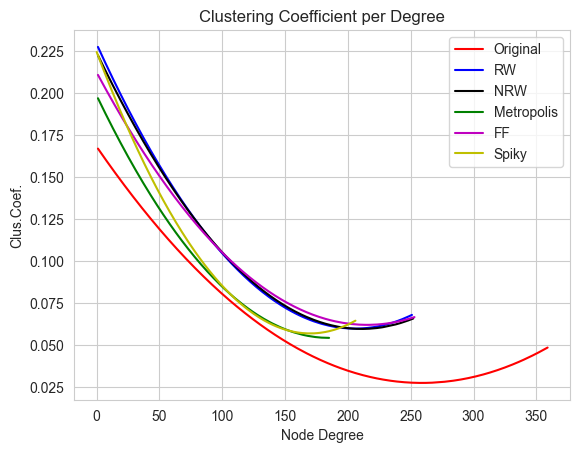

In [70]:
z = np.polyfit(degrees, clustering_list,2)
p = np.poly1d(z)
plt.plot(degrees,p(degrees),"r")

z = np.polyfit(degrees1, clustering_list1,2)
p = np.poly1d(z)
plt.plot(degrees1,p(degrees1),"blue")

z = np.polyfit(degrees2, clustering_list2,2)
p = np.poly1d(z)
plt.plot(degrees2,p(degrees2),"black")

z = np.polyfit(degrees3, clustering_list3,2)
p = np.poly1d(z)
plt.plot(degrees3,p(degrees3),"g")

z = np.polyfit(degrees4, clustering_list4,2)
p = np.poly1d(z)
plt.plot(degrees4,p(degrees4),"m")

z = np.polyfit(degrees5, clustering_list5,2)
p = np.poly1d(z)
plt.plot(degrees5,p(degrees5),"y")

plt.legend(['Original','RW', 'NRW', 'Metropolis','FF','Spiky'])
plt.title("Clustering Coefficient per Degree")
plt.ylabel("Clus.Coef.")
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel("Node Degree")

In [57]:
def average_degree_neighbor(original, sample):
   degree = sample.degree()
   degree_list,degrees,neighbor_list,kstest = [],[],[],[]
   for n,m in degree:
      degree_list.append(m)
   degree_list
   degree_np = np.asarray(sorted(degree_list))
  

   for k in range(len(np.unique(degree_np))):
      nodes_degree_k = ([u for u in sample.nodes() if sample.degree(u) == k])
      # print(nodes_degree_k)
      if len(nodes_degree_k) != 0:
         sample_aver_neighbor_deg = nx.average_neighbor_degree( sample , nodes = nodes_degree_k)

         original_nodes_degree_k = ([u for u in original.nodes() if original.degree(u) == k])
         original_aver_neighbor_deg = nx.average_neighbor_degree( original , nodes = original_nodes_degree_k)


         original_avg_neighbor_degree = np.fromiter(original_aver_neighbor_deg.values(), dtype=float)
         sample_aver_neighbor_deg = np.fromiter(sample_aver_neighbor_deg.values(), dtype=float)

         if len(original_avg_neighbor_degree) != 0:
            if len(sample_aver_neighbor_deg) != 0:
               ks_test = stats.ks_2samp(preprocessing.scale(original_avg_neighbor_degree), preprocessing.scale(sample_aver_neighbor_deg))[0]
         
               kstest.append(ks_test)

         list_avg = mean(sample_aver_neighbor_deg) 
         degrees.append(k)
         neighbor_list.append(list_avg)
      nodes_degree_k = []
   
   kstest_neighbor_degree = np.average(kstest)
         
   return degrees,neighbor_list,kstest_neighbor_degree

In [58]:
ts = time.time()

degrees,neighbor_list,kstest_neighbor_degree = average_degree_neighbor(graph,graph)
degrees1,neighbor_list1,kstest_neighbor_degree1 = average_degree_neighbor(graph,rw_graph)
degrees2,neighbor_list2,kstest_neighbor_degree2 = average_degree_neighbor(graph,nrw_graph)
degrees3,neighbor_list3,kstest_neighbor_degree3 = average_degree_neighbor(graph,metropolis_graph)
degrees4,neighbor_list4,kstest_neighbor_degree4 = average_degree_neighbor(graph,ff_graph)
degrees5,neighbor_list5,kstest_neighbor_degree5 = average_degree_neighbor(graph,spiky_graph)

time.time() - ts

218.34412789344788

Text(0.5, 0, 'Node Degree')

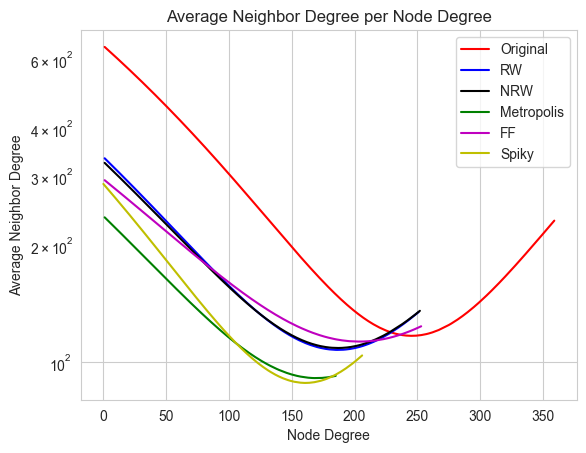

In [71]:
z = np.polyfit(degrees, neighbor_list,2)
p = np.poly1d(z)
plt.plot(degrees,p(degrees),"r")

z = np.polyfit(degrees1, neighbor_list1,2)
p = np.poly1d(z)
plt.plot(degrees1,p(degrees1),"blue")

z = np.polyfit(degrees2, neighbor_list2,2)
p = np.poly1d(z)
plt.plot(degrees2,p(degrees2),"black")

z = np.polyfit(degrees3, neighbor_list3,2)
p = np.poly1d(z)
plt.plot(degrees3,p(degrees3),"g")

z = np.polyfit(degrees4, neighbor_list4,2)
p = np.poly1d(z)
plt.plot(degrees4,p(degrees4),"m")

z = np.polyfit(degrees5, neighbor_list5,2)
p = np.poly1d(z)
plt.plot(degrees5,p(degrees5),"y")

plt.legend(['Original','RW', 'NRW', 'Metropolis', 'FF', 'Spiky'])
plt.title("Average Neighbor Degree per Node Degree")
plt.ylabel("Average Neighbor Degree")
# plt.xscale('log')
plt.yscale('log')
plt.xlabel("Node Degree")

# KOLMOGOROV-SMIRNOV TEST

KS-TEST FOR DEGREE DISTRIBUTION

In [60]:
#SCALING THE DATA

std_deg = preprocessing.scale(deg)
std_deg1 = preprocessing.scale(deg1)
std_deg2 = preprocessing.scale(deg2)
std_deg3 = preprocessing.scale(deg3)
std_deg4 = preprocessing.scale(deg4)
std_deg5 = preprocessing.scale(deg5)

In [61]:
print("RW ---> ", stats.ks_2samp(std_deg, std_deg1))
print("N-RW ---> ", stats.ks_2samp(std_deg, std_deg2))
print("Metropolis ---> ", stats.ks_2samp(std_deg, std_deg3))
print("FF ---> ", stats.ks_2samp(std_deg, std_deg4))
print("Spiky ---> ", stats.ks_2samp(std_deg, std_deg5))

RW --->  KstestResult(statistic=0.2196078431372549, pvalue=8.100289577797193e-07)
N-RW --->  KstestResult(statistic=0.20508070631567543, pvalue=5.335224128257568e-06)
Metropolis --->  KstestResult(statistic=0.21839080459770116, pvalue=7.838388300286524e-07)
FF --->  KstestResult(statistic=0.21052631578947367, pvalue=1.2355979817295234e-05)
Spiky --->  KstestResult(statistic=0.15231778296451678, pvalue=0.005673450750142727)


KS-TEST FOR AVERAGE CLUSTERING COEFFICIENT PER NODE DEGREE

In [62]:
print("RW ---> ", avg_kstest1)
print("N-RW ---> ", avg_kstest2)
print("Metropolis ---> ", avg_kstest3)
print("FF ---> ", avg_kstest4)
print("Spiky ---> ",avg_kstest5)

RW --->  0.27642369869255684
N-RW --->  0.2988225593204079
Metropolis --->  0.31738907307163405
FF --->  0.29517960605683796
Spiky --->  0.3184590407009135


KS-TEST FOR AVERAGE NEIGHBORHOOD DEGREE PER NODE DEGREE

In [63]:
print("RW ---> ", kstest_neighbor_degree1)
print("N-RW ---> ", kstest_neighbor_degree2)
print("Metropolis ---> ", kstest_neighbor_degree3)
print("FF ---> ", kstest_neighbor_degree4)
print("Spiky ---> ",kstest_neighbor_degree5)

RW --->  0.2636457827649247
N-RW --->  0.28333723981686554
Metropolis --->  0.30622116115475695
FF --->  0.2757752257752275
Spiky --->  0.3061628995952133
